<a href="https://colab.research.google.com/github/aidanvu1992/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/Anh_Vu_Linear_Algebra_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1.1 Graph vector $\vec{a}$ 

\begin{align}
\vec{a} = \begin{bmatrix} 3 \\ 2 \end{bmatrix}
\end{align}

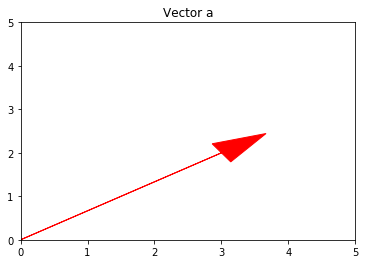

In [110]:
# Graph vector a
a = [3, 2]

plt.arrow( 0, 0, a[0], a[1], head_width = 0.5, head_length = 0.8, color ='r')
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.title('Vector a')
plt.show()

## 1.2 Find $||\vec{b}||$. What does the norm of a vector represent?
\begin{align}
\vec{b} = \begin{bmatrix} 17 & -4 & -2 & 1\end{bmatrix}
\end{align}


In [0]:
# Find norm of b
b = np.array([17, -4, -2, 1])
b_norm = np.linalg.norm(b)
print(b_norm)

17.60681686165901


**Norm represents the magnitude or length of the vector**

## 1.3 Find $\vec{c} \cdot \vec{d}$ - Are these vectors orthogonal? Why or why not?

\begin{align}
\vec{c} = \begin{bmatrix}3 & 7 & -2 & 12\end{bmatrix}
\qquad
\vec{d} = \begin{bmatrix}9 & -7 & 4 & 6\end{bmatrix}
\end{align}

In [0]:
# Find dot product of c and d
c = np.array([3, 7, -2, 12])
d = np.array([9, -7, 4, 6])
c_d = np.dot(c, d)
print(c_d)

42


# C and D are not orthogonal since their dot product is not equal to 0

## 1.4 Find $E^{-1}$ and $E^{T}$

\begin{align}
E = 
\begin{bmatrix}
    7 & 4 & 2 \\
    1 & 3 & -1 \\
    2 & 6 & -4
\end{bmatrix}
\end{align}

In [0]:
#Create matrix E
E = np.matrix('7 4 2; 1 3 -1; 2 6 -4')
E

matrix([[ 7,  4,  2],
        [ 1,  3, -1],
        [ 2,  6, -4]])

In [0]:
# Find inverse of E
inverse = np.linalg.inv(E)
print(inverse)

[[ 0.17647059 -0.82352941  0.29411765]
 [-0.05882353  0.94117647 -0.26470588]
 [ 0.          1.         -0.5       ]]


In [0]:
# Find transpose of E
transpose = E.T
print(transpose)

[[ 7  1  2]
 [ 4  3  6]
 [ 2 -1 -4]]


## 1.5 Find $|F|$ - What is one reason why the determinant of a matrix would be 0? 

\begin{align}
F = 
\begin{bmatrix}
    2 & -2 & 5 \\
    4 & 1 & 10 \\
    12 & 6 & 30
\end{bmatrix}
\end{align}

In [0]:
# Initiate matrix F
F = np.matrix('2 -2 5; 4 1 10; 12 6 30')
F

matrix([[ 2, -2,  5],
        [ 4,  1, 10],
        [12,  6, 30]])

In [0]:
determinant = np.linalg.det(F)
print(determinant)

0.0


**One of the reasons why the determinant of this matrix is 0 is that it is NOT invertible**

In [0]:
#Check for the inverse
print(np.linalg.inv(F))

LinAlgError: ignored

# Intermediate Linear Algebra

## 2.1 Suppose that the number of customers at a ski resort as well as the number of inches of fresh powder (snow)  was recorded for 7 days. 

### Customers: [820, 760, 1250, 990, 1080, 1450, 1600]

### Inches of new snow: [0, 1, 7, 1, 0, 6, 4 ]

## Find the mean, sample variance, and sample standard deviation for both the number of customers and inches of new snow for the week. Remember that on SCs you can use library functions, dataframes, .describe(), etc. 



In [0]:
customers = [820, 760, 1250, 990, 1080, 1450, 1600]
snow = [0, 1, 7, 1, 0, 6, 4]

In [0]:
from functools import reduce
def get_mean_var_std(n):
    #find mean
    total = reduce(lambda x, y: x + y, n)
    mean = total/len(n)
    
    #find var, std
    sum = 0
    for i in n:
      sum += (i - mean)**2
      variance = sum/(len(n) - 1)
      stddev = variance**0.5
    return f'Mean is {mean}, Variance is {variance}, Standard Dev is {stddev}'

In [0]:
# Mean, variance, std of customer
get_mean_var_std(customers)

'Mean is 1135.7142857142858, Variance is 98761.90476190478, Standard Dev is 314.26406851866597'

In [0]:
# Mean, variance, std of snow
get_mean_var_std(snow)

'Mean is 2.7142857142857144, Variance is 8.571428571428571, Standard Dev is 2.9277002188455996'

In [0]:
# Check using library function describe
cust_snow = pd.DataFrame({'customers':customers, 'snow': snow})
cust_snow.describe()

,customers,snow
count,7.000000,7.000000
mean,1135.714286,2.714286
std,314.264069,2.927700
min,760.000000,0.000000
25%,905.000000,0.500000
50%,1080.000000,1.000000
75%,1350.000000,5.000000
max,1600.000000,7.000000


## 2.2 Are the variances of the number of customers and inches of snow comparable? 
## Why or why not? 

No they are not comparable. The reason is that the variance number os customers are much greater than that of snow(98761.904 to 8.57). Also, units of these 2 are different, hence not comparable

## 2.3 Find the variance-covariance matrix for the number of customers and inches of snow at the ski resort. 

In [0]:
# Covariance table
cov_table = cust_snow.cov()
cov_table

,customers,snow
customers,98761.904762,670.238095
snow,670.238095,8.571429


In [111]:
# Covariance of customers and inches of snow
var_cov = cov_table.iloc[1]['customers']
var_cov

670.2380952380952

# PCA

## 3.1 Standardize the data so that it has a mean of 0 and a standard deviation of 1. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing the data or PCA.

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html>

In [114]:
# Let me get you some data to start you off.
import pandas as pd

data = {"Country": ["England","Wales","Scotland","North Ireland"], 
        "Cheese": [105,103,103,66], 
        "Carcass_Meat": [245,227,242,267], 
        "Other_Meat": [685, 803, 750, 586], 
        "Fish": [147, 160, 122, 93], 
        "Fats_and_Oils": [193, 235, 184, 209], 
        "Sugars": [156, 175, 147, 139], 
        "Fresh_Potatoes": [720, 874, 566, 1033], 
        "Fresh_Veg": [253, 265, 171, 143], 
        "Other_Veg": [488, 570, 418, 355], 
        "Processed_Potatoes": [198, 203, 220, 187], 
        "Processed_Veg": [360, 365, 337, 334], 
        "Fresh_Fruit": [1102, 1137, 957, 674], 
        "Cereals": [1472, 1582, 1462, 1494], 
        "Beverages": [57,73,53,47], 
        "Soft_Drinks": [1374, 1256, 1572, 1506], 
        "Alcoholic Drinks": [375, 475, 458, 135], 
        "Confectionery": [54, 64, 62, 41]}

df = pd.DataFrame(data)

# Look at the data
df.head()

,Country,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,North Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [115]:
##### Your Code Here #####
# Check column types
df.dtypes

Country               object
Cheese                 int64
Carcass_Meat           int64
Other_Meat             int64
Fish                   int64
Fats_and_Oils          int64
Sugars                 int64
Fresh_Potatoes         int64
Fresh_Veg              int64
Other_Veg              int64
Processed_Potatoes     int64
Processed_Veg          int64
Fresh_Fruit            int64
Cereals                int64
Beverages              int64
Soft_Drinks            int64
Alcoholic Drinks       int64
Confectionery          int64
dtype: object

In [116]:
# Drop country column as it is categorial
df = df.drop('Country', axis = 1)
df.head()

,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [117]:
# Create shallow copy of the df
df = df.copy()
print(df.shape)
df.head()

(4, 17)


,Cheese,Carcass_Meat,Other_Meat,Fish,Fats_and_Oils,Sugars,Fresh_Potatoes,Fresh_Veg,Other_Veg,Processed_Potatoes,Processed_Veg,Fresh_Fruit,Cereals,Beverages,Soft_Drinks,Alcoholic Drinks,Confectionery
0,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
1,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
2,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
3,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


In [118]:
# Check for NaN value
df.isnull().sum()

Cheese                0
Carcass_Meat          0
Other_Meat            0
Fish                  0
Fats_and_Oils         0
Sugars                0
Fresh_Potatoes        0
Fresh_Veg             0
Other_Veg             0
Processed_Potatoes    0
Processed_Veg         0
Fresh_Fruit           0
Cereals               0
Beverages             0
Soft_Drinks           0
Alcoholic Drinks      0
Confectionery         0
dtype: int64

In [119]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df = scaler.fit_transform(df)
df

array([[ 0.65827466, -0.01749546, -0.25954622,  0.64458535, -0.63242919,
         0.13055067, -0.45007561,  0.86331183,  0.37773603, -0.33626508,
         0.80547723,  0.73740709, -0.64432226, -0.05191741, -0.43523112,
         0.10499766, -0.13830319],
       [ 0.53580495, -1.27716878,  1.19885635,  1.15244047,  1.53589947,
         1.54795798,  0.43569619,  1.09352832,  1.40168163,  0.08406627,
         1.17160324,  0.9292974 ,  1.67946294,  1.60943981, -1.40423624,
         0.84182336,  0.96812236],
       [ 0.53580495, -0.22744102,  0.54381113, -0.33205912, -1.09707105,
        -0.54085279, -1.33584741, -0.70983418, -0.49636387,  1.51319287,
        -0.87870243, -0.0575671 , -0.85557546, -0.46725672,  1.19072664,
         0.71656299,  0.74683725],
       [-1.72988456,  1.52210526, -1.48312126, -1.4649667 ,  0.19360077,
        -1.13765587,  1.35022682, -1.24700598, -1.28305378, -1.26099406,
        -1.09837804, -1.60913739, -0.17956522, -1.09026568,  0.64874072,
        -1.66338402

In [120]:
#Check mean and std
def get_mean_std(n):
    #find mean
    total = reduce(lambda x, y: x + y, n)
    mean = total/len(n)
    
    #find var, std
    sum = 0
    for i in n:
      sum += (i - mean)**2
      variance = sum/(len(n) - 1)
      stddev = variance**0.5
    return f'Mean is {mean}, Standard Dev is {stddev}'
get_mean_std(df)

'Mean is [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00\n  6.93889390e-18 -5.55111512e-17  0.00000000e+00  5.55111512e-17\n  0.00000000e+00  0.00000000e+00 -5.55111512e-17  0.00000000e+00\n  6.93889390e-18 -5.55111512e-17 -2.77555756e-17  0.00000000e+00\n  5.55111512e-17], Standard Dev is [1.15470054 1.15470054 1.15470054 1.15470054 1.15470054 1.15470054\n 1.15470054 1.15470054 1.15470054 1.15470054 1.15470054 1.15470054\n 1.15470054 1.15470054 1.15470054 1.15470054 1.15470054]'

## 3.2 Perform PCA on the data and graph Principal Component 1 against Principal Component 2. 

This might be helpful:

<https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html>

In [0]:
##### Your Code Here #####
from sklearn.decomposition import PCA

In [0]:
# Create dataframe for pc1 and pc2
pca = PCA(n_components = 2)
pc1_pc2 = pca.fit_transform(df)
pc1_pc2 = pd.DataFrame(pc1_pc2, columns = ['pc1', 'pc2'])

In [0]:
def scree_plot(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(18, 6))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s" % ((str(vals[i]*100)[:3])), (ind[i], vals[i]), va="bottom", ha="center", fontsize=10)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')

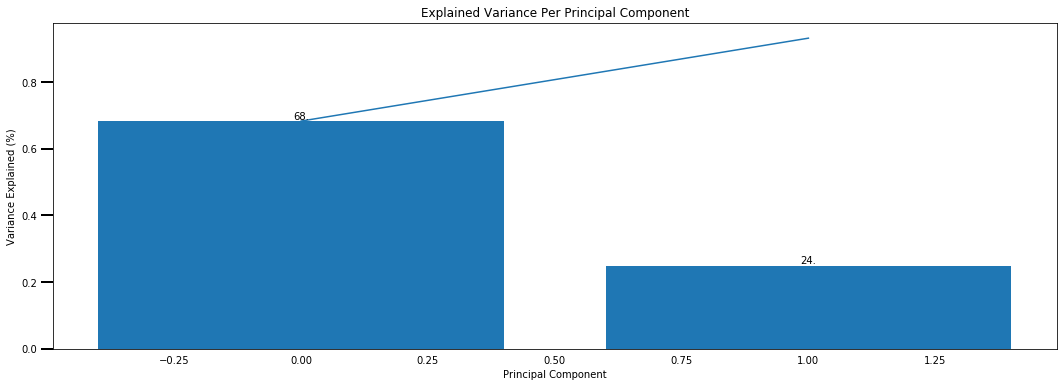

In [146]:
scree_plot(pca)

In [123]:
pc1_pc2

,pc1,pc2
0,-0.954490,0.328318
1,-4.520951,-1.735380
2,0.487978,3.233672
3,4.987462,-1.826611


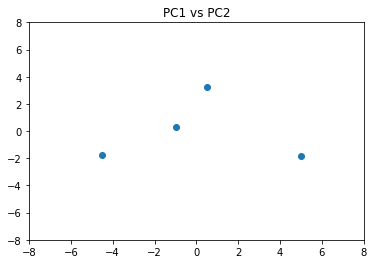

In [159]:
# Graph scatter plot
plt.scatter(pc1_pc2['pc1'],pc1_pc2['pc2'])
plt.xlim(-8, 8)
plt.ylim(-8, 8)
plt.title("PC1 vs PC2")
plt.show()

## 3.3 What are Eigenvalues and Eigenvectors? -In general, not just in PCA.

Eigenvectors are vectors that do not change direction during any transformation. Eigenvalues are scalars that scale the eigenvectors during the transformationYour Answer Here

# Clustering

## 4.1 Use K-Means to cluster the following data and then graph your results. 

We have included some code to get you started so that you don't get stuck on something that isn't standardizing clustering.

Prioritize calculating the clusters over graphing them. 

Scikit-Learn K-Means Documentation:

<https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html>

In [0]:
from sklearn.cluster import KMeans

In [147]:
points = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/points.csv')
points.head()

,x,y
0,-7.846803,-3.421277
1,-3.554323,-6.884729
2,-0.192822,-9.671030
3,-6.401456,-5.223972
4,-0.804026,-9.704457


In [0]:
##### Your Code Here #####
# Create pc1 and pc2

pca = PCA(n_components = 2)
Z = pca.fit_transform(points)
points_1 = pd.DataFrame(Z, columns = ['pc1', 'pc2'])

In [171]:
points_1.head()

,pc1,pc2
0,-2.797536,-4.762657
1,-3.608286,0.692943
2,-4.307011,5.002809
3,-3.619255,-2.603139
4,-4.645542,4.492825


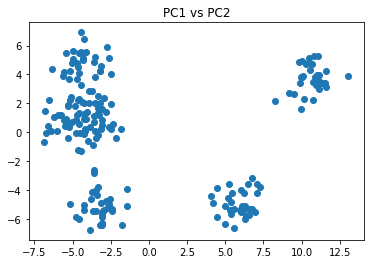

In [172]:
# Graph scatter plot
plt.scatter(points_1['pc1'],points_1['pc2'])
plt.title("PC1 vs PC2")
plt.show()

In [0]:
# Function for elbow graph
def elbow_graph(df):
  sum_of_squared_distances = []
  K = range(1, 20)
  for k in K:
    km = KMeans(n_clusters = k)
    km = km.fit(df)
    sum_of_squared_distances.append(km.inertia_)
    
  plt.plot(K, sum_of_squared_distances, 'b*-', color = 'r')
  plt.xlabel('K')
  plt.ylabel('SSE')
  plt.title('Elbow Method For Optimal K')
  plt.show()

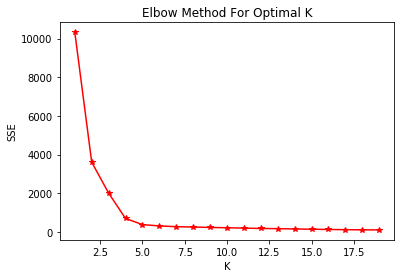

In [174]:
# Elbow method to find optimal K
elbow_graph(points_1)

In [0]:
# It looks optimal to try 5

kmeans = KMeans(n_clusters = 5, random_state = 0)
kmeans.fit(points_1)
K = kmeans.predict(points_1)

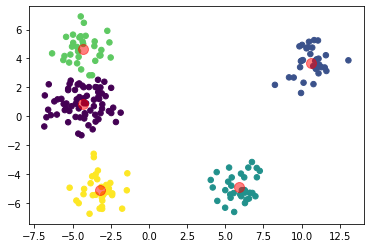

In [189]:
# Graph scatter plot with centroids
plt.scatter(points_1['pc1'],points_1['pc2'], c=K, s=30)

centroids_pc = kmeans.cluster_centers_
plt.scatter(centroids_pc[:,0], centroids_pc[:,1], c='r', s=100, alpha=0.5);

# Stretch Goals (AKA how to get a 3):

Complete the stretch goals for each section in order to get a 3 on that section.

## Parts 1 & 2 (do all of the following): 
  - Comment your code well with both markdown and inline comments where appropriate
  - Show your work with code and possibly LaTeX 
  - Justify your answers particularly well to show advanced mastery of this section

## Part 3 (do all of the following): 
 - Create a Scree Plot to show the Proportion of Explained Variance of each Principal Component (more than the first two)
    - If you want to include a the cumulative proportion of explained variance, you might be interested in this NumPy Function: [numpy.cumsum](https://docs.scipy.org/doc/numpy/reference/generated/numpy.cumsum.html)
 - Give a top-notch explanation of eigenvalues and eigenvectors. Feel free to any materials, images, code, graphs, LaTeX, etc. to spruce up your answer.

## Part 4 (do all of the following):
- Justify your choice of k, both visually (scatterplot) and mathematically (elbow plot).